In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import json
import ipywidgets as widgets
import plotly
import scipy
%matplotlib inline
import folium
import geopandas

plt.style.use("fivethirtyeight")




# Load Airbnb Dataset

In [65]:
# Files to Load
listings_df= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Project4 /listings.csv")
listings_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.831910,2.318700,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
1,5396,Rental unit in Paris · ★4.59 · Studio ++· 1 be...,7903,Borzou,NaN,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,146.0,1,374,2023-12-11,2.12,2,0,48,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,140.0,10,343,2023-11-16,2.22,7,198,22,7510400829623
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74324,1043629451440755792,Rental unit in Paris · ★New · Studio · 1 bed ·...,50308796,Anais,NaN,Ménilmontant,48.868059,2.407307,Entire home/apt,52.0,1,0,NaN,NaN,1,100,0,7512010784549
74325,1043707020977346344,Rental unit in Paris · ★New · 1 bedroom · 1 be...,18385602,Stanislas,NaN,Buttes-Montmartre,48.891719,2.335972,Entire home/apt,500.0,1,0,NaN,NaN,1,27,0,7511810784902
74326,1043932119757241230,Rental unit in Paris · ★New · 3 bedrooms · 4 b...,335998296,Studioprestige,NaN,Entrepôt,48.874650,2.355466,Entire home/apt,324.0,1,0,NaN,NaN,121,362,0,7511505605678
74327,1043947326757240041,Rental unit in Paris · ★New · 1 bedroom · 2 be...,503331047,John,NaN,Élysée,48.869724,2.318358,Entire home/apt,85.0,1,0,NaN,NaN,30,290,0,7510810007394


# About the Dataset – Airbnb Bookings


This Airbnb dataset contains over 74,000 observations from Paris , with 18 columns of data.

The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

This Dataset may be useful for analyzing trends and patterns in the Airbnb market in Paris and also gain insights into the preferences and behavior of Airbnb users in the area.

This dataset contains information about Airbnb bookings in Paris in 2023. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the Paris.

# 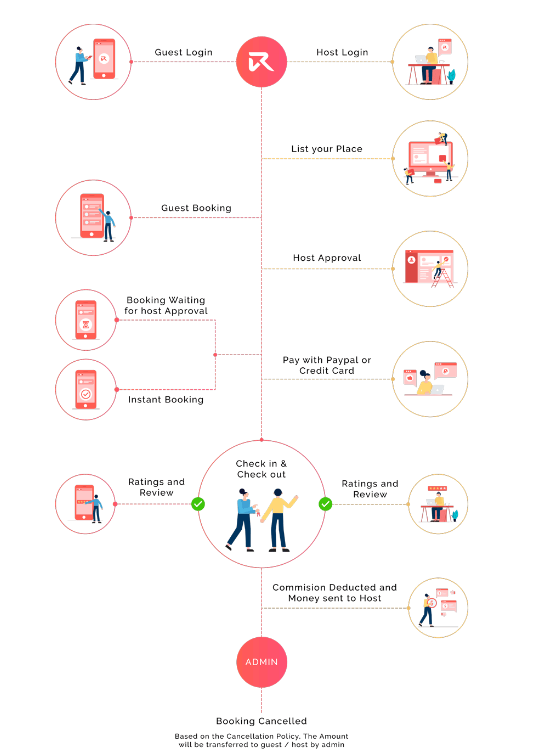






Understand The Given Variables





Listing_id :- This is a unique identifier for each listing in the dataset.

Listing_name :- This is the name or title of the listing, as it appears on the Airbnb website.

Host_id :- This is a unique identifier for each host in the dataset.

Host_name :- This is the name of the host as it appears on the Airbnb website.

Neighbourhood_group :- This is a grouping of neighborhoods in Paris, such as Élysée	or Louvre .

Neighbourhood :- This is the specific neighborhood in which the listing is located.

Latitude :- This is the geographic latitude of the listing.

Longitude :- This is the geographic longitude of the listing.

Room_type :- This is the type of room or property being offered, such as an entire home, private room, shared room.

Price :- This is the nightly price for the listing, in Euro.

Minimum_nights :- This is the minimum number of nights that a guest must stay at the listing.

Total_reviews :- This is the total number of reviews that the listing has received.

Reviews_per_month :- This is the average number of reviews that the listing receives per month.

Host_listings_count :- This is the total number of listings that the host has on Airbnb.

Availability_365 :- This is the number of days in the next 365 days that the listing is available for booking.



### **Data Exploration and Data Cleaning**


In [66]:
# How many unique listings are there
listings_df['id'].nunique()
# Same size as df

74329

In [67]:
#Summary Stats
#Look at describe stats
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
1,5396,Rental unit in Paris · ★4.59 · Studio ++· 1 be...,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,1,374,2023-12-11,2.12,2,0,48,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,10,343,2023-11-16,2.22,7,198,22,7510400829623
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."


In [68]:
listings_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [69]:
#checking what are the variables here
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [70]:
# check duplicate rows in dataset
listings_df = listings_df.drop_duplicates()
listings_df.count()

id                                74329
name                              74329
host_id                           74329
host_name                         74320
neighbourhood_group                   0
neighbourhood                     74329
latitude                          74329
longitude                         74329
room_type                         74329
price                             67108
minimum_nights                    74329
number_of_reviews                 74329
last_review                       56438
reviews_per_month                 56438
calculated_host_listings_count    74329
availability_365                  74329
number_of_reviews_ltm             74329
license                           54687
dtype: int64

There is no any duplicate rows in Dataset

In [71]:
# checking null values of each columns
listings_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             9
neighbourhood_group               74329
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              7221
minimum_nights                        0
number_of_reviews                     0
last_review                       17891
reviews_per_month                 17891
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19642
dtype: int64

In [72]:
# melt listings data for graphing purposes
melted_listings = pd.melt(listings_df, id_vars=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood', 'latitude',])

In [73]:
melted_listings["variable"].value_counts()

longitude                         74329
room_type                         74329
price                             74329
minimum_nights                    74329
number_of_reviews                 74329
last_review                       74329
reviews_per_month                 74329
calculated_host_listings_count    74329
availability_365                  74329
number_of_reviews_ltm             74329
license                           74329
Name: variable, dtype: int64

In [74]:
#filter df to selected attribute
filtered = melted_listings[melted_listings['variable'] == "room_type"].copy()
filtered

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,variable,value
74329,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.831910,room_type,Entire home/apt
74330,5396,Rental unit in Paris · ★4.59 · Studio ++· 1 be...,7903,Borzou,NaN,Hôtel-de-Ville,48.852470,room_type,Entire home/apt
74331,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.859090,room_type,Entire home/apt
74332,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.874170,room_type,Entire home/apt
74333,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.860060,room_type,Entire home/apt
...,...,...,...,...,...,...,...,...,...
148653,1043629451440755792,Rental unit in Paris · ★New · Studio · 1 bed ·...,50308796,Anais,NaN,Ménilmontant,48.868059,room_type,Entire home/apt
148654,1043707020977346344,Rental unit in Paris · ★New · 1 bedroom · 1 be...,18385602,Stanislas,NaN,Buttes-Montmartre,48.891719,room_type,Entire home/apt
148655,1043932119757241230,Rental unit in Paris · ★New · 3 bedrooms · 4 b...,335998296,Studioprestige,NaN,Entrepôt,48.874650,room_type,Entire home/apt
148656,1043947326757240041,Rental unit in Paris · ★New · 1 bedroom · 2 be...,503331047,John,NaN,Élysée,48.869724,room_type,Entire home/apt


In [75]:
# How many unique listings are there
listings_df['id'].nunique()


74329

In [76]:
# How many unique listings are there
listings_df['id'].nunique()


74329

In [77]:
# How many unique listings are there
listings_df['id'].nunique()
# Same size as df

74329

In [78]:
# so there are 20* unique neighborhood in Dataset
listings_df['neighbourhood'].nunique()

20

In [79]:
#so total 10336 different hosts in Airbnb in Paris
listings_df['host_name'].nunique()

10336

In [80]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
1,5396,Rental unit in Paris · ★4.59 · Studio ++· 1 be...,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,1,374,2023-12-11,2.12,2,0,48,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,10,343,2023-11-16,2.22,7,198,22,7510400829623
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."


In [81]:
# The 'calculated_host_listings_count' represents how many listings a given host has.
lph_dict = {'calculated_host_listings_count': 'listings_per_host'}
listings_df.rename(columns=lph_dict, inplace=True)
listings_df[listings_df['listings_per_host'] < 2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.831910,2.318700,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."
5,9952,Rental unit in Paris · ★4.92 · 1 bedroom · 1 b...,33534,Elisabeth,NaN,Popincourt,48.863730,2.370930,Entire home/apt,130.0,4,49,2023-09-24,0.37,1,169,7,7511101582862
7,81106,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,439130,Edouard,NaN,Entrepôt,48.884400,2.360910,Entire home/apt,110.0,7,66,2023-11-12,0.43,1,53,6,7511006045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74319,1043574776999079243,Rental unit in Paris · ★New · 2 bedrooms · 1 bath,210364206,Tristan,NaN,Hôtel-de-Ville,48.855320,2.355920,Entire home/apt,NaN,3,0,NaN,NaN,1,23,0,7510410782615
74320,1043589347871961032,Rental unit in Paris · ★New · 1 bedroom · 1 be...,545762082,Lilit,NaN,Vaugirard,48.836449,2.288286,Entire home/apt,150.0,2,0,NaN,NaN,1,87,0,7511510783696
74321,1043594946630290469,Rental unit in Paris · ★New · 1 bedroom · 1 be...,469400836,Agustin,NaN,Buttes-Montmartre,48.887683,2.356101,Entire home/apt,80.0,2,0,NaN,NaN,1,36,0,7511810784110
74324,1043629451440755792,Rental unit in Paris · ★New · Studio · 1 bed ·...,50308796,Anais,NaN,Ménilmontant,48.868059,2.407307,Entire home/apt,52.0,1,0,NaN,NaN,1,100,0,7512010784549


Text(0.5, 1.0, 'Listings by The 10 Top Neighborhoods in Paris')

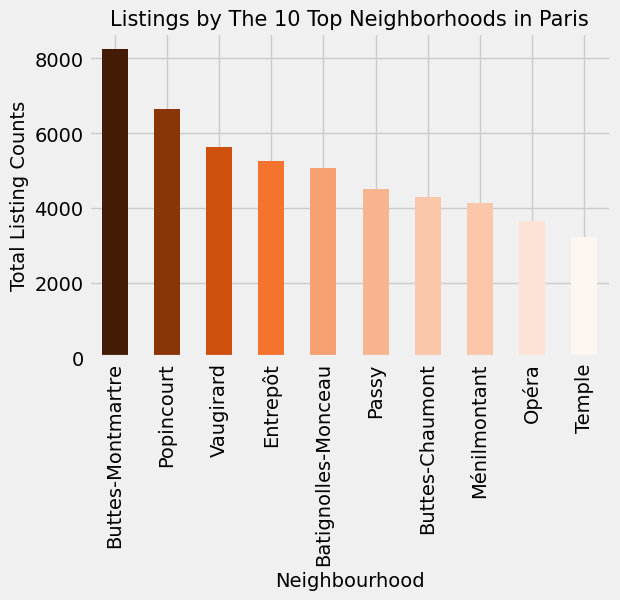

In [82]:
# Get the top 10 neighborhoods by listing count
top_10_neigbourhoods = listings_df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['#441B04', '#893508', '#CD500C', '#F3732F', '#F7A173', '#F8B48F', '#FAC7AB', '#FAC7AB', '#FDE3D5', '#FEF6F1']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(6, 4), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by The 10 Top Neighborhoods in Paris', fontsize=15)

## **Reviews**

In [83]:
# Which type of room gets the most reviews
listings_df.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    21.565742
Hotel room         51.021739
Private room       32.077925
Shared room        34.784946
Name: number_of_reviews, dtype: float64

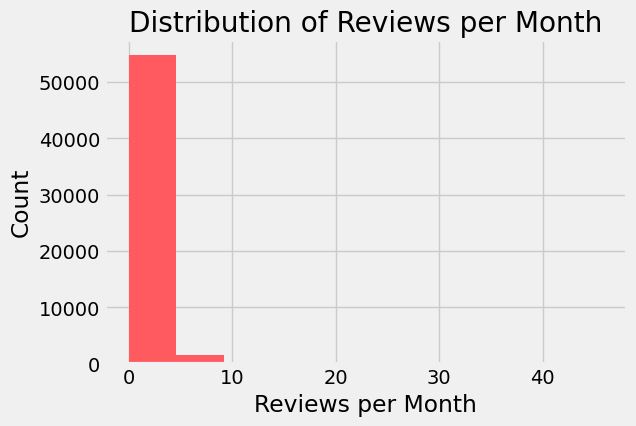

In [84]:
# Reviews per month
plt.figure(figsize=(6, 4))
plt.hist(listings_df['reviews_per_month'], color='#FF5A5F')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count');

In [85]:
total_reviews = listings_df['number_of_reviews'].sum()
print("Total number of reviews:", total_reviews)

Total number of reviews: 1721452


In [86]:
#Group by host_id and calculate the total number of reviews for each host
host_reviews = listings_df.groupby('host_id')['reviews_per_month'].count().reset_index(name='total_reviews')

# Sort the data to find the host with the most reviews
host_most_reviews = host_reviews.sort_values(by='total_reviews', ascending=False).iloc[0]

# Retrieve the host with the most reviews
most_reviews_host_id = host_most_reviews['host_id']
most_reviews_count = host_most_reviews['total_reviews']

print(f"The host with ID {most_reviews_host_id} received the most reviews: {most_reviews_count} reviews.")


The host with ID 50502817 received the most reviews: 320 reviews.


In [87]:
temp_df = ['host_id']==50502817
listings_df.rename(columns=lph_dict, inplace=True)
listings_df[listings_df['host_id']==50502817]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
1041,1022819,Rental unit in Paris · ★4.57 · 1 bedroom · 1 b...,50502817,Pierre De WeHost,NaN,Buttes-Montmartre,48.887900,2.333680,Entire home/apt,83.0,3,134,2023-10-22,1.05,424,221,14,7511800369476
1667,1679784,Rental unit in Paris · ★4.64 · Studio · 2 beds...,50502817,Pierre De WeHost,NaN,Hôtel-de-Ville,48.858050,2.356890,Entire home/apt,176.0,3,47,2023-10-04,0.47,424,0,15,7510405265095
3832,4247920,Rental unit in Paris · ★4.52 · 1 bedroom · 2 b...,50502817,Pierre De WeHost,NaN,Buttes-Chaumont,48.879380,2.373350,Entire home/apt,82.0,3,21,2023-07-31,0.19,424,64,2,7511906573291
5173,5983430,Rental unit in Paris · ★4.80 · 2 bedrooms · 3 ...,50502817,Pierre De WeHost,NaN,Ménilmontant,48.865250,2.397570,Entire home/apt,93.0,3,10,2023-08-20,0.19,424,0,4,7512003315945
5523,6254984,Rental unit in Paris · ★4.92 · 1 bedroom · 1 b...,50502817,Pierre De WeHost,NaN,Élysée,48.878690,2.321320,Entire home/apt,109.0,4,97,2023-10-12,0.96,424,169,11,7510800314423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73411,1036726234562447926,Rental unit in Paris · ★New · 1 bedroom · 1 be...,50502817,Pierre De WeHost,NaN,Entrepôt,48.878480,2.350100,Entire home/apt,63.0,3,0,NaN,NaN,424,233,0,7511005910871
73801,1039714633705369230,Rental unit in Paris · ★New · 1 bedroom · 2 be...,50502817,Pierre De WeHost,NaN,Vaugirard,48.835840,2.283240,Entire home/apt,135.0,2,0,NaN,NaN,424,241,0,7511507171140
73891,1039802547967087464,Rental unit in Paris · ★New · 1 bedroom · 2 be...,50502817,Pierre De WeHost,NaN,Louvre,48.862449,2.349970,Entire home/apt,98.0,3,0,NaN,NaN,424,252,0,7510106008516
73897,1039825530102347783,Rental unit in Paris · ★New · 2 bedrooms · 3 b...,50502817,Pierre De WeHost,NaN,Temple,48.865227,2.358844,Entire home/apt,151.0,3,0,NaN,NaN,424,332,0,7510305966195


In [88]:
temp_df = listings_df[listings_df['listings_per_host'] == 50502817]

In [89]:
temp_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings_per_host', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [90]:
# Create new variable for distribution of listings per host
# Listings.groupby('host_id')['id'].count()
listings_df['listings_per_host']

0          1
1          2
2          7
3          1
4          1
        ... 
74324      1
74325      1
74326    121
74327     30
74328      9
Name: listings_per_host, Length: 74329, dtype: int64

In [91]:
average_listings_per_host = listings_df.groupby('host_id')['id'].count().mean()
print("Average number of listings per host:", average_listings_per_host)

Average number of listings per host: 1.3514609356533756


In [92]:
# create a new DataFrame that displays the top 10 hosts in the Airbnb Paris dataset based on the number of listings each host has
top_10_hosts = listings_df['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'
top_10_hosts.columns = ['host_name', 'Total_listings']

# display the resulting DataFrame
top_10_hosts

,host_name,Total_listings
0,Joffrey,1089
1,Marie,706
2,Blueground,628
3,Camille,619
4,Pierre,566
5,Nicolas,494
6,Thomas,489
7,Guillaume,472
8,Sophie,469
9,Antoine,459


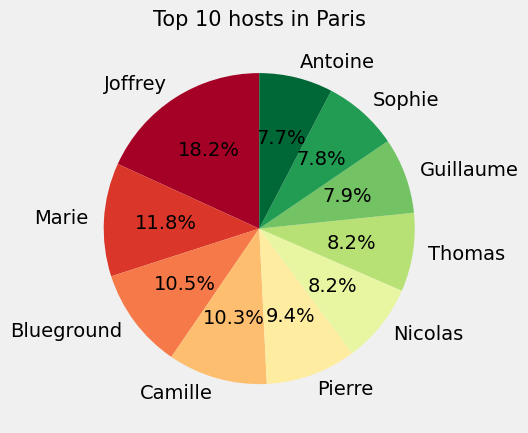

In [93]:
# Total Listings per host

# Define the data for the pie chart
sizes = top_10_hosts["Total_listings"]
labels = top_10_hosts["host_name"]

# Define the colors using the 'RdYlGn' colormap
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(sizes)))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, colors=colors)
plt.title('Top 10 hosts in Paris', fontsize=15)

plt.show()

# Listings Price

In [94]:
# group by neighborhood, get mean and median price
grouped_df = listings_df.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()
grouped_df = grouped_df.sort_values(by='mean', ascending=False)
grouped_df


,neighbourhood,mean,median
19,Élysée,386.641818,200.0
14,Passy,382.067933,170.0
12,Palais-Bourbon,330.194888,185.5
7,Louvre,325.465902,199.0
8,Luxembourg,287.169570,180.0
13,Panthéon,269.114862,150.0
17,Temple,252.831646,160.0
1,Bourse,246.330947,162.0
6,Hôtel-de-Ville,242.708561,170.0
11,Opéra,237.104356,150.0


In [95]:
# calculate outliers within neighbourhoods
stdev = 3.0

zscores = listings_df[['neighbourhood', 'price']].groupby('neighbourhood').transform(
    lambda group: (group - group.mean()).div(group.std())).abs()

outliers = zscores > stdev

# take out outliers
listings_nonoutliers = listings_df[~outliers.any(axis=1)].copy()


# agg all the observations by nieghbourhood to get median and mean
summary = listings_df.groupby("neighbourhood").agg({'price':['mean', 'median', 'count']}).reset_index()
summary.columns = ['Neighbourhood', 'Mean Price', 'Median Price', '# of listings']

# strip outliers and redo agg
summary_nonoutliers = listings_nonoutliers.groupby("neighbourhood").agg({'price':['mean', 'count']}).reset_index()
summary_nonoutliers.columns = ['Neighbourhood', 'Mean Price', '# of listings']

# merge
summary_final = pd.merge(summary, summary_nonoutliers, on='Neighbourhood', suffixes=[" with outliers", " without outliers"])
summary_final["# of outliers"] = summary_final["# of listings with outliers"] - summary_final["# of listings without outliers"]
summary_final.drop(['# of listings without outliers'], axis=1, inplace=True)

# mean price by nieghborhood
(
    summary_final
    .sort_values(["Mean Price without outliers"], ascending=False)[['Neighbourhood', 'Mean Price with outliers', 'Mean Price without outliers', 'Median Price', '# of outliers']]
    .style.background_gradient(cmap='RdYlGn', subset=['Mean Price with outliers', 'Median Price', 'Mean Price without outliers'])


)

,Neighbourhood,Mean Price with outliers,Mean Price without outliers,Median Price,# of outliers
14,Passy,382.067933,301.880276,170.000000,56
19,Élysée,386.641818,299.651790,200.000000,49
12,Palais-Bourbon,330.194888,275.083829,185.500000,29
7,Louvre,325.465902,269.079794,199.000000,15
8,Luxembourg,287.169570,245.536776,180.000000,35
6,Hôtel-de-Ville,242.708561,217.876845,170.000000,28
17,Temple,252.831646,217.231108,160.000000,13
11,Opéra,237.104356,216.913109,150.000000,3
13,Panthéon,269.114862,213.046053,150.000000,5
1,Bourse,246.330947,212.721562,162.000000,19


In [96]:
# filter out top 5% to be fair
listings_price_summary = listings_df.query("price <= price.quantile(.95)")

listings_price_summary = listings_price_summary.groupby("neighbourhood")['price'].describe().reset_index()
listings_price_summary['IQR'] = listings_price_summary['75%']  - listings_price_summary['25%']

(
listings_price_summary
[["neighbourhood", 'mean', 'std', '25%', '50%', '75%', 'IQR']].round(1)
.sort_values(["IQR","mean"], ascending=False).style.background_gradient(cmap="RdYlGn")
    .format(lambda x: "${:.0f}".format(x) if type(x) != str else x)

)

,neighbourhood,mean,std,25%,50%,75%,IQR
19,Élysée,$209,$125,$114,$180,$278,$164
14,Passy,$185,$117,$98,$150,$250,$152
8,Luxembourg,$198,$118,$106,$169,$257,$151
7,Louvre,$212,$113,$125,$190,$275,$150
12,Palais-Bourbon,$198,$117,$110,$169,$252,$142
6,Hôtel-de-Ville,$192,$110,$110,$162,$250,$140
17,Temple,$185,$107,$106,$156,$240,$134
1,Bourse,$187,$109,$107,$158,$234,$127
13,Panthéon,$174,$107,$98,$142,$220,$122
11,Opéra,$169,$101,$100,$141,$210,$110


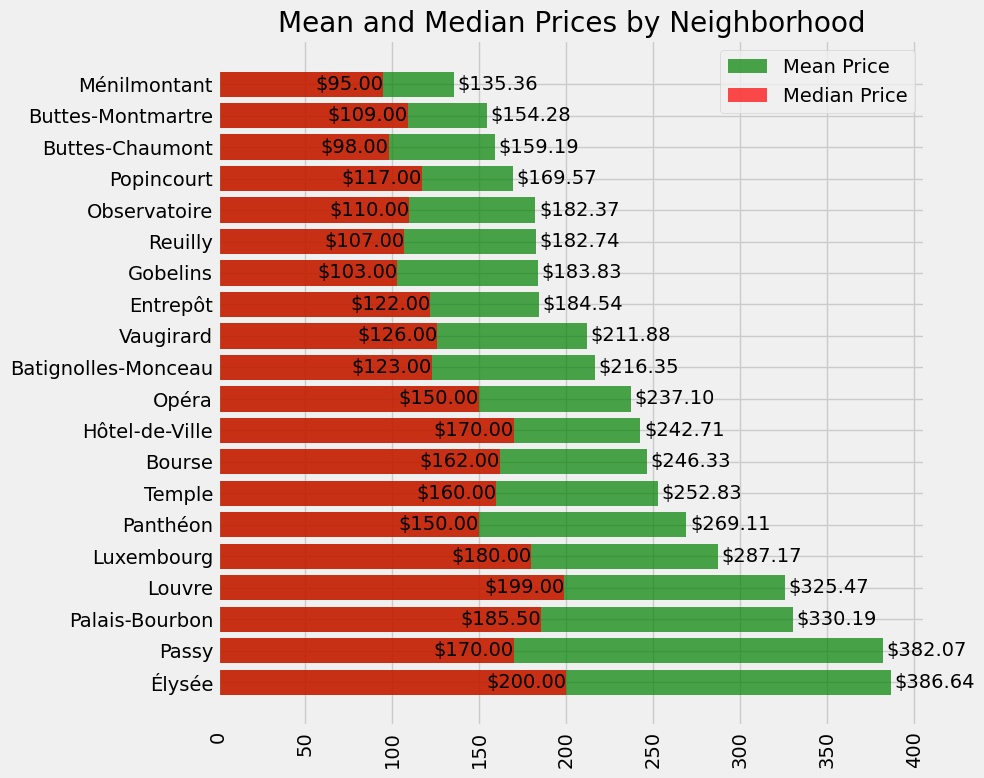

In [97]:
# plot mean and median price by
plt.figure(figsize=(10, 8))

plt.barh(grouped_df['neighbourhood'], grouped_df['mean'], label='Mean Price', color='green', alpha=0.7)
plt.barh(grouped_df['neighbourhood'], grouped_df['median'], label='Median Price', color='red', alpha=0.7)


# Place xticks on top of each bar
for index, (mean_value, median_value) in enumerate(zip(grouped_df['mean'], grouped_df['median'])):
    plt.text(median_value, index, f'${median_value:.2f}', va='center', multialignment='center', ha='right')
    plt.text(mean_value + 2, index, f'${mean_value:.2f}', va='center', multialignment='center')

plt.title('Mean and Median Prices by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Place xticks on top of each bar

plt.show()

In [98]:
# how many listings are less or equal than 10
cheapest_listings = listings_df[listings_df['price']<=10]
print(cheapest_listings.shape)

(14, 18)


In [99]:
#how many listings are less 100
listings_df[listings_df['price'] < 100].shape

(22272, 18)

In [100]:
#how many listings are less than 500
listings_df[listings_df['price'] < 500].shape

(62795, 18)

In [101]:
# how many listings are less than 1000
listings_df[listings_df['price'] < 1000].shape

(65558, 18)

In [102]:
#how many listings are more than 998
listings_df[listings_df['price'] >998].shape

(1564, 18)

In [103]:
cheapest_price = listings_df['price'].min()
most_expensive_price = listings_df['price'].max()

print("Cheapest price:", cheapest_price)
print("Most expensive price:", most_expensive_price)

Cheapest price: 8.0
Most expensive price: 84420.0


In [104]:
# The bulk of the data is still around $300 or lower
# Also logically - tourists might be deterred from a price above $300 a night
affordable_listings = listings_df[listings_df['price'] < 300]
affordable_listings.shape

(57439, 18)

In [105]:
average_price = listings_df['price'].mean()
print("Average Price for the Entire Neighborhood: ", average_price)

Average Price for the Entire Neighborhood:  221.16173928592715


# Room Type

In [106]:
# Look at how many of each room type there are
listings_df['room_type'].value_counts()

Entire home/apt    64669
Private room        8367
Hotel room           828
Shared room          465
Name: room_type, dtype: int64

In [107]:
listings_df['room_type'].value_counts(normalize=True)

Entire home/apt    0.870037
Private room       0.112567
Hotel room         0.011140
Shared room        0.006256
Name: room_type, dtype: float64

In [108]:
roomtype_value_counts=[64669, 8367, 828, 465]

In [109]:
roomtypes = ['Entire home/apt','Private room', 'Hotel room', 'Shared room']

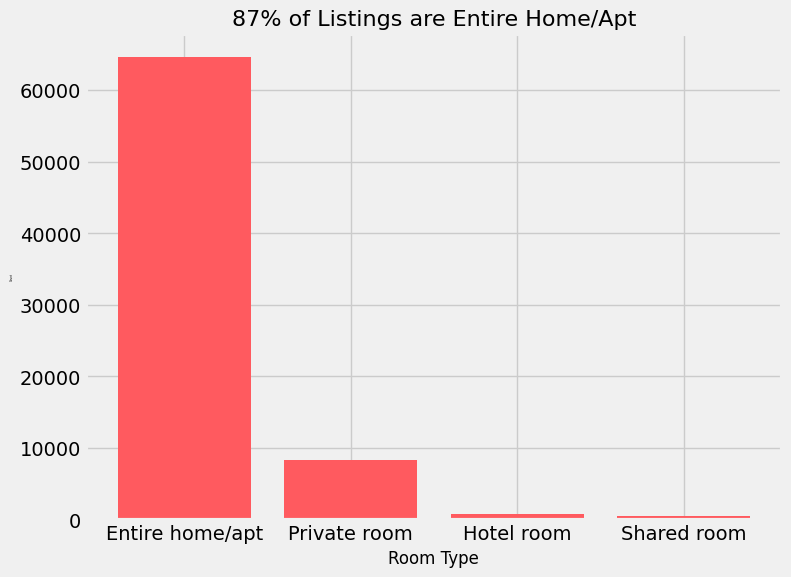

In [110]:
# Plot count of each room type to show what is most common
plt.figure(figsize=(8, 6))
plt.bar(x=roomtypes, height=roomtype_value_counts, color='#FF5A5F')
plt.title('87% of Listings are Entire Home/Apt', fontdict={'fontsize': 16})
plt.xlabel('Room Type', fontdict={'fontsize': 12})
plt.ylabel("Count", fontdict={'fontsize': 2});

In [111]:
# Which type of room gets the most reviews
listings_df.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    21.565742
Hotel room         51.021739
Private room       32.077925
Shared room        34.784946
Name: number_of_reviews, dtype: float64

In [112]:
listings_df['availability_365'].value_counts()

0      26001
365      962
364      648
363      601
89       441
       ...  
282       54
229       48
276       48
284       48
279       45
Name: availability_365, Length: 366, dtype: int64

In [113]:
print(listings_df.shape)
listings_df.head()

(74329, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
0,3109,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,150.0,2,4,2019-10-24,0.05,1,327,0,7511409139079
1,5396,Rental unit in Paris · ★4.59 · Studio ++· 1 be...,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,1,374,2023-12-11,2.12,2,0,48,7510402838018
2,7397,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,10,343,2023-11-16,2.22,7,198,22,7510400829623
3,7964,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,180.0,7,5,2015-09-14,0.03,1,25,0,7510903576564
4,9359,Rental unit in Paris · 1 bedroom · 1 bed · 1 bath,28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75.0,180,0,NaN,NaN,1,185,0,"Available with a mobility lease only (""bail mo..."


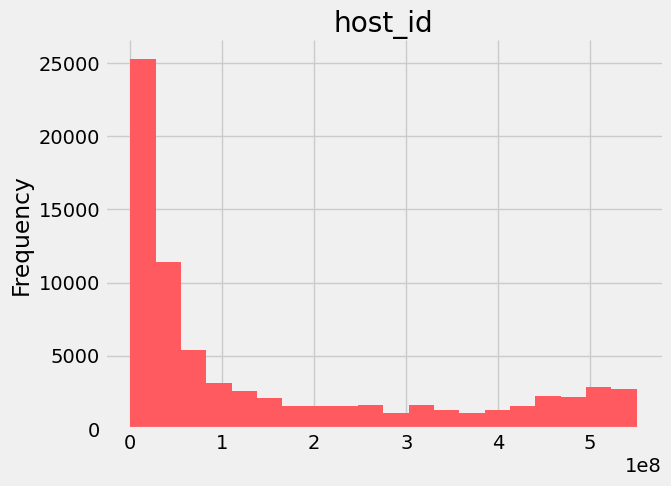

In [114]:
listings_df['host_id'].plot(kind='hist', bins=20, title='host_id', color='#FF5A5F')
plt.gca().spines[['top', 'right',]].set_visible(False)